In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/content/sample_data/ibtracs.NI.list.v04r01.csv")

In [3]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,...,,,,,,,,,9,265
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,...,,,,,,,,,9,265
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,...,,,,,,,,,9,265
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,...,,,,,,,,,9,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62477,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 00:00:00,NR,12.5,80.6,...,,,,,,,,,2,130
62478,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 03:00:00,NR,12.4,80.8,...,,,,,,,,,4,125
62479,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 06:00:00,NR,12.3,80.9,...,,,,,,,,,2,160
62480,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 09:00:00,NR,12.2,80.8,...,,,,,,,,,3,250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62482 entries, 0 to 62481
Columns: 174 entries, SID to STORM_DIR
dtypes: int64(1), object(173)
memory usage: 82.9+ MB


In [6]:
df_clean = df.iloc[1:].copy()

numeric_cols = ['LAT', 'LON', 'WMO_WIND', 'WMO_PRES']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean['ISO_TIME'] = pd.to_datetime(df_clean['ISO_TIME'])

# Extracting Year:
df_clean['YEAR'] = df_clean['ISO_TIME'].dt.year

# Filtering for South Asia (NI) AND Year 2010-2025
south_asia_2010_2025 = df_clean[
    (df_clean['BASIN'] == 'NI') &
    (df_clean['YEAR'] >= 2010) &
    (df_clean['YEAR'] <= 2025)
].copy()

print(f"Filtered Data (2010-2025): Found {len(south_asia_2010_2025)} records.")
print("Years included:", south_asia_2010_2025['YEAR'].unique())

Filtered Data (2010-2025): Found 5545 records.
Years included: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025]


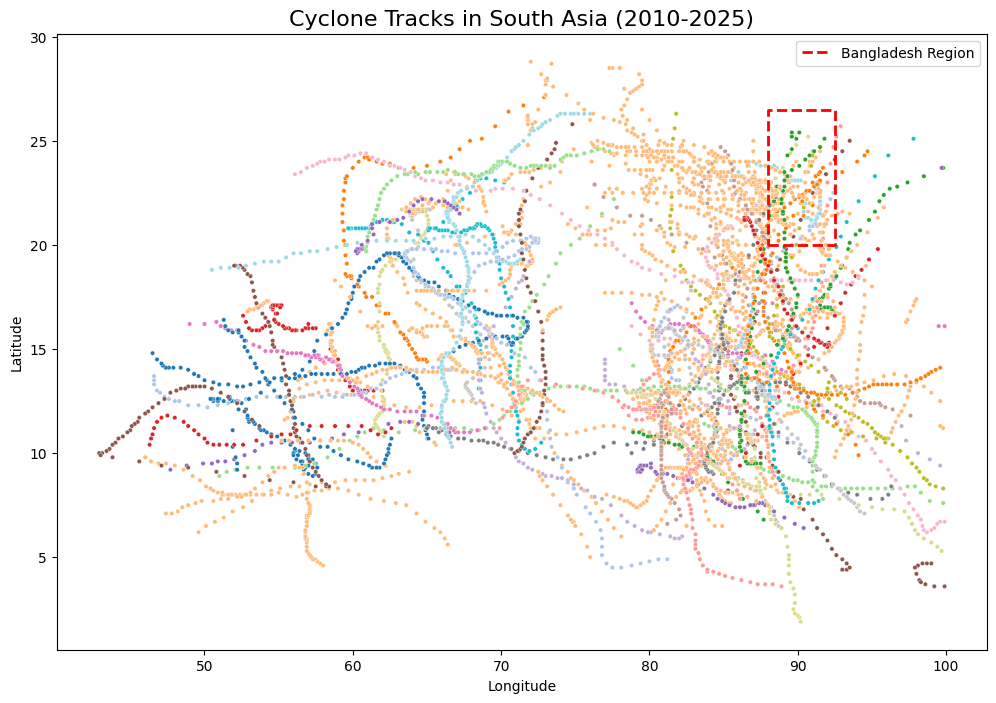

In [7]:
# 8. Visualization
# Map of tracks 2010-2025
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=south_asia_2010_2025,
    x='LON',
    y='LAT',
    hue='NAME',
    palette='tab20',
    s=10,
    legend=False
)
plt.title('Cyclone Tracks in South Asia (2010-2025)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Bangladesh region box for context
plt.plot([88, 92.5, 92.5, 88, 88], [20, 20, 26.5, 26.5, 20], color='red', linewidth=2, linestyle='--', label='Bangladesh Region')
plt.legend()
plt.savefig('tracks_2010_2025.png')
plt.show()

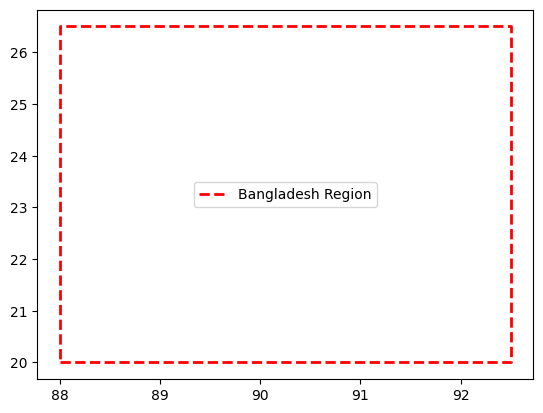

In [8]:
# Add Bangladesh region box for context
plt.plot([88, 92.5, 92.5, 88, 88], [20, 20, 26.5, 26.5, 20], color='red', linewidth=2, linestyle='--', label='Bangladesh Region')
plt.legend()
plt.savefig('tracks_2010_2025.png')
plt.show()

In [9]:
# Count of cyclones per year in this range
yearly_counts = south_asia_2010_2025.groupby('YEAR')['SID'].nunique()
print("\nCyclones per year (2010-2025):")
print(yearly_counts)


Cyclones per year (2010-2025):
YEAR
2010     8
2011    10
2012     5
2013    10
2014     8
2015    12
2016     8
2017    12
2018    13
2019    12
2020    10
2021    10
2022    15
2023    10
2024    13
2025     5
Name: SID, dtype: int64


In [11]:
df_new = pd.read_csv("/content/south_asia_cyclones_2010_2025.csv")
df_new

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR,YEAR
0,2010136N09057,2010,23,NI,AS,BANDU,2010-05-15 12:00:00,DS,9.3,56.5,...,,,,,,,,6,85,2010
1,2010136N09057,2010,23,NI,AS,BANDU,2010-05-15 15:00:00,DS,9.3,56.8,...,,,,,,,,5,80,2010
2,2010136N09057,2010,23,NI,AS,BANDU,2010-05-15 18:00:00,DS,9.4,57.0,...,,,,,,,,4,40,2010
3,2010136N09057,2010,23,NI,AS,BANDU,2010-05-15 21:00:00,DS,9.6,57.1,...,,,,,,,,4,0,2010
4,2010136N09057,2010,23,NI,AS,BANDU,2010-05-16 00:00:00,DS,9.8,57.0,...,,,,,,,,3,345,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 00:00:00,NR,12.5,80.6,...,,,,,,,,2,130,2025
5541,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 03:00:00,NR,12.4,80.8,...,,,,,,,,4,125,2025
5542,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 06:00:00,NR,12.3,80.9,...,,,,,,,,2,160,2025
5543,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 09:00:00,NR,12.2,80.8,...,,,,,,,,3,250,2025


In [12]:
from google.colab import files

files.download('south_asia_cyclones_2010_2025.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>